# Housing Price Prediction


Problem Statement :
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. 

For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

Importing the Required Libraries


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Loading The Dataset


In [5]:
#loading and reading the data
df= pd.read_csv("train_housing.csv")

Data Assesing

In [3]:
#Checking the Data dimesion
df.shape

(1168, 81)

In [4]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [7]:
# Using the info method to get an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
#Lets get a general idea about the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


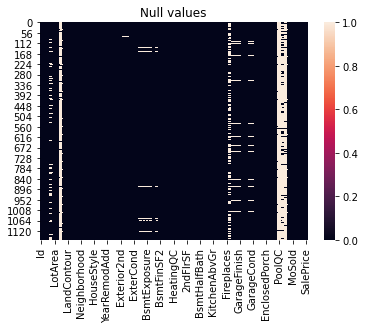

In [9]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Well at first we can see that we are not at luck as there a lot of missing values to treat. Presently we should do some Feature Engineering on the Date Feature so we can have the option to utilize the day and the month segments in building our model later. Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [10]:
#checking the skewness
df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

From the above we can see that we have to deal with skewness as well, as it is present all over he datset.

Id                  AxesSubplot(0.125,0.125;0.0170705x0.755)
MSSubClass       AxesSubplot(0.145485,0.125;0.0170705x0.755)
LotFrontage      AxesSubplot(0.165969,0.125;0.0170705x0.755)
LotArea          AxesSubplot(0.186454,0.125;0.0170705x0.755)
OverallQual      AxesSubplot(0.206938,0.125;0.0170705x0.755)
OverallCond      AxesSubplot(0.227423,0.125;0.0170705x0.755)
YearBuilt        AxesSubplot(0.247907,0.125;0.0170705x0.755)
YearRemodAdd     AxesSubplot(0.268392,0.125;0.0170705x0.755)
MasVnrArea       AxesSubplot(0.288877,0.125;0.0170705x0.755)
BsmtFinSF1       AxesSubplot(0.309361,0.125;0.0170705x0.755)
BsmtFinSF2       AxesSubplot(0.329846,0.125;0.0170705x0.755)
BsmtUnfSF         AxesSubplot(0.35033,0.125;0.0170705x0.755)
TotalBsmtSF      AxesSubplot(0.370815,0.125;0.0170705x0.755)
1stFlrSF           AxesSubplot(0.3913,0.125;0.0170705x0.755)
2ndFlrSF         AxesSubplot(0.411784,0.125;0.0170705x0.755)
LowQualFinSF     AxesSubplot(0.432269,0.125;0.0170705x0.755)
GrLivArea        AxesSub

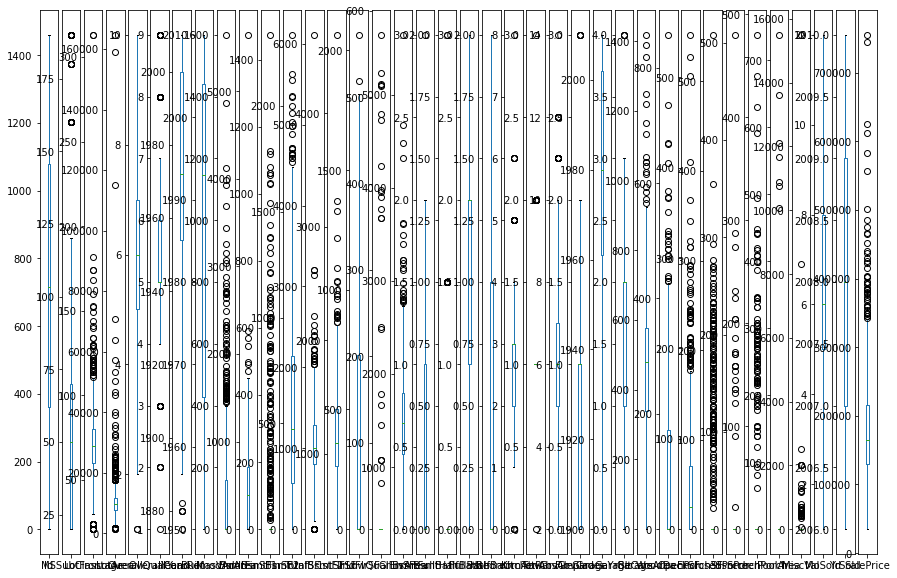

In [12]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,figsize=(15,10))

Checking For Missing Values

In [6]:
missing_values=[x for x in df.columns if df[x].isnull().sum()>1]

print('Number of missing variable columns:', len(missing_values))

print('Missing values in the dataset : \n ', missing_values)

print('-'*125)

df[missing_values].head()

Number of missing variable columns: 18
Missing values in the dataset : 
  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
-----------------------------------------------------------------------------------------------------------------------------


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,None,0.0,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,BrkFace,480.0,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Stone,126.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN


In [7]:
for feature in missing_values:
 print(feature, np.round(df[feature].isnull().mean()*100,4), '% Missing Values')

LotFrontage 18.3219 % Missing Values
Alley 93.4075 % Missing Values
MasVnrType 0.5993 % Missing Values
MasVnrArea 0.5993 % Missing Values
BsmtQual 2.5685 % Missing Values
BsmtCond 2.5685 % Missing Values
BsmtExposure 2.6541 % Missing Values
BsmtFinType1 2.5685 % Missing Values
BsmtFinType2 2.6541 % Missing Values
FireplaceQu 47.1747 % Missing Values
GarageType 5.4795 % Missing Values
GarageYrBlt 5.4795 % Missing Values
GarageFinish 5.4795 % Missing Values
GarageQual 5.4795 % Missing Values
GarageCond 5.4795 % Missing Values
PoolQC 99.4007 % Missing Values
Fence 79.7089 % Missing Values
MiscFeature 96.2329 % Missing Values


There are many missing values present in the dataset hence need to check the relationship with Saleprice

In [12]:
#Extracting all the numerical values using python code:-

numerical_features=[x for x in df.columns if df[x].dtypes != 'O']

print('The number of the numerical columns in the dataset:', len(numerical_features))

print('Numerical columns in the dataset:\n', numerical_features)

print('-'*125)

df[numerical_features].head()

The number of the numerical columns in the dataset: 38
Numerical columns in the dataset:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
-----------------------------------------------------------------------------------------------------------------------------


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [13]:
#Extract the year column from the dataset using the python code:-

year_feature=[x for x in df.columns if 'Yr' in x or 'Year' in x]

print('The number of Year column in the dataset :',len(year_feature))

print('Year columns in the dataset :\n',year_feature)

print('-'*125)

df[year_feature].head()



The number of Year column in the dataset : 4
Year columns in the dataset :
 ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
-----------------------------------------------------------------------------------------------------------------------------


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009


In [15]:
# checking the unique items in the datetime columns

for feature in year_feature:
 print('The unique items in the colunmn', feature, ':\n', df[feature].unique())

The unique items in the colunmn YearBuilt :
 [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
The unique items in the colunmn YearRemodAdd :
 [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
The unique items in the colunmn Garag

Relationship Between Feature vs Saleprice:

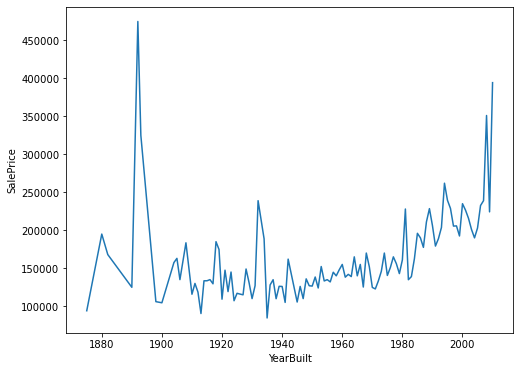

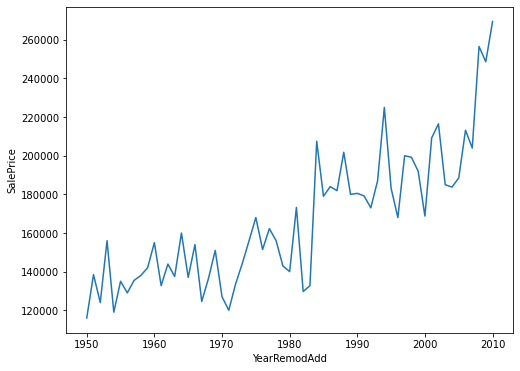

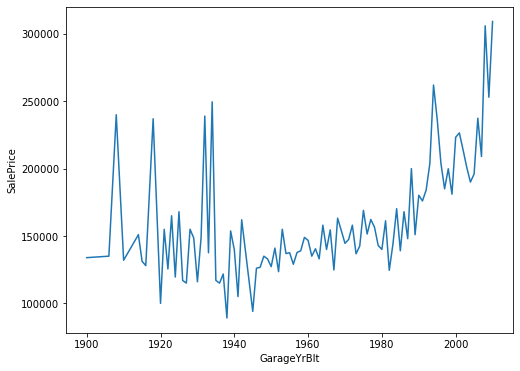

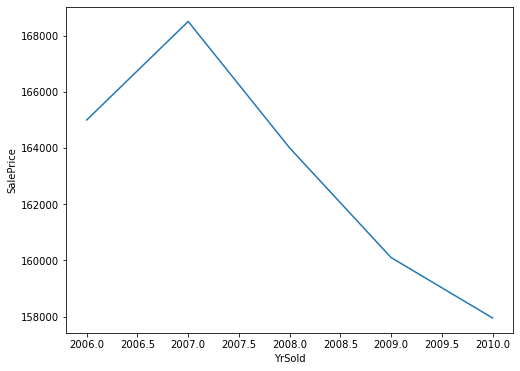

In [16]:
for feature in year_feature:
 plt.figure(figsize=(8,6))
 df.groupby(feature)['SalePrice'].median().plot()
 plt.xlabel(feature)
 plt.ylabel('SalePrice')
 plt.show()

Extracting the discrete and continous variable using the python code:-

In [18]:
discrete_feature=[x for x in numerical_features if len(df[x].unique())<25 and x not in year_feature+['Id']]

print('The number of discrete column in the dataset:', len(discrete_feature))

print('Discrete columns in the datset: \n', discrete_feature)

print('-'*125)

df[discrete_feature].head()

The number of discrete column in the dataset: 17
Discrete columns in the datset: 
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
-----------------------------------------------------------------------------------------------------------------------------


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


Extracting the continous variable:


In [20]:

continous_feature=[x for x in numerical_features if x not in discrete_feature+year_feature+['Id']]

print('The number of continous feature column in the dataset :',len(continous_feature))

print('Continous feature columns in the dataset :\n',continous_feature)

print('-'*125)

df[continous_feature].head()

The number of continous feature column in the dataset : 16
Continous feature columns in the dataset :
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
-----------------------------------------------------------------------------------------------------------------------------


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,NaN,4928,0.0,120,0,958,1078,958,0,958,440,0,205,0,0,128000
1,95.0,15865,0.0,351,823,1043,2217,2217,0,2217,621,81,207,0,224,268000
2,92.0,9920,0.0,862,0,255,1117,1127,886,2013,455,180,130,0,0,269790
3,105.0,11751,480.0,705,0,1139,1844,1844,0,1844,546,0,122,0,0,190000
4,NaN,16635,126.0,1246,0,356,1602,1602,0,1602,529,240,0,0,0,215000


As we can see most of the features are right skewed. need transformation to make it a normal distribution curve.

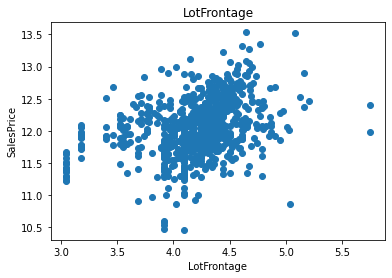

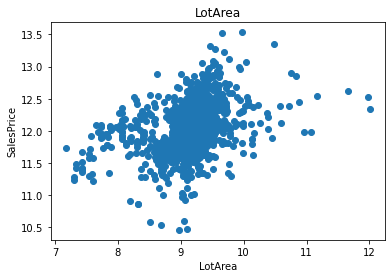

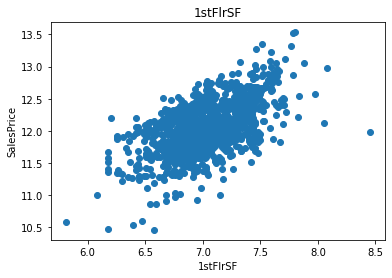

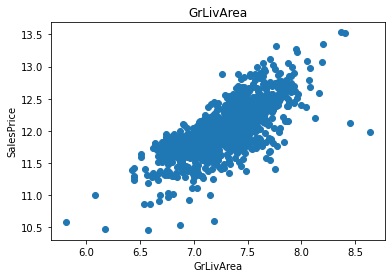

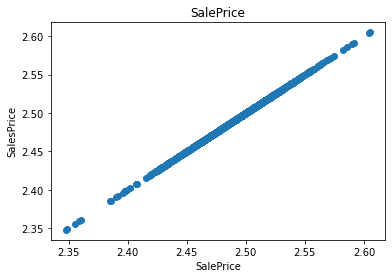

In [22]:
#Log transformation can be done using the following python code:-

for feature in continous_feature:

 data=df.copy()

 if 0 in data[feature].unique():

  pass

 else:

  data[feature]=np.log(data[feature])

  data['SalePrice']=np.log(data['SalePrice'])

  plt.scatter(data[feature],data['SalePrice'])

  plt.xlabel(feature)

  plt.ylabel('SalesPrice')

  plt.title(feature)

  plt.show()

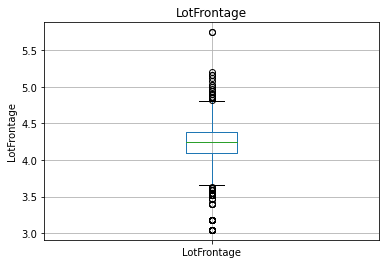

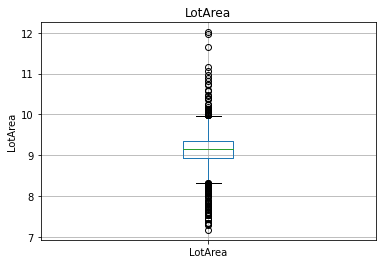

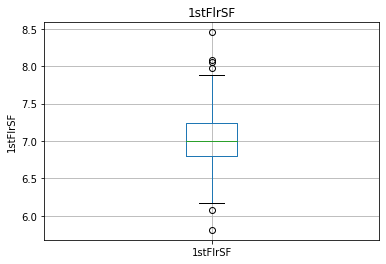

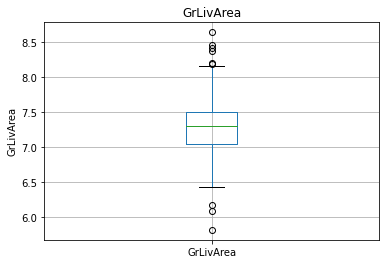

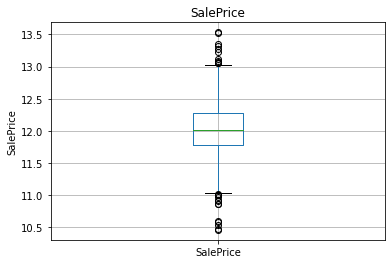

In [23]:
#To check the outliers we are using the box plot.

for feature in continous_feature:

 data=df.copy()

 if 0 in data[feature].unique():

  pass

 else:

  data[feature]=np.log(data[feature])

  data.boxplot(feature)

  plt.ylabel(feature)

  plt.title(feature)

  plt.show()

There are lot of outliers in the dataset, which we will treat accordingly

Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10¶

In [25]:
df['YearBuilt_Old'] = df.YearBuilt.max()-df.YearBuilt
df['YearRemodAdd_Old'] = df.YearRemodAdd.max()-df.YearRemodAdd
df['GarageYrBlt_Old'] = df.GarageYrBlt.max()-df.GarageYrBlt
df['YrSold_Old'] = df.YrSold.max()-df.YrSold
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
673,1964,1978,1964.0,2007,46,32,46.0,3
733,2005,2005,2005.0,2008,5,5,5.0,2
845,1950,1950,1950.0,2009,60,60,60.0,1
605,1988,1989,1988.0,2008,22,21,22.0,2
158,1972,1972,1980.0,2008,38,38,30.0,2
525,1998,1998,1998.0,2006,12,12,12.0,4
960,1972,2003,1974.0,2009,38,7,36.0,1
996,2004,2005,2004.0,2009,6,5,6.0,1
1064,2005,2006,2005.0,2006,5,4,5.0,4
971,1963,1963,1963.0,2010,47,47,47.0,0


Lets drop the actual Year columns

In [27]:
df = df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

Imputing missing value

Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [29]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt_Old.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [30]:
df.Street.value_counts()
df.Utilities.value_counts()
df = df.drop(['Street','Utilities'],axis='columns')

'Id' column is also of no use for our analysis hence dropping the column

In [33]:
df = df.drop('Id',axis='columns')
df[list(df.dtypes[df.dtypes!='object'].index)].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,102.310078,444.726027,46.647260,569.721747,1061.095034,...,3.639555,15.051370,3.448630,47.315068,6.344178,181477.005993,39.069349,25.241438,30.008562,2.195205
std,41.940650,24.82875,8957.442311,1.390153,1.124343,182.047152,462.664785,163.520016,449.375525,442.272249,...,29.088867,55.080816,44.896939,543.264432,2.686352,79105.586863,30.145255,20.785185,25.325066,1.329738
min,20.000000,21.00000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,0.000000,0.000000,0.000000,216.000000,799.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,130375.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163995.000000,38.000000,17.000000,25.500000,2.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,...,0.000000,0.000000,0.000000,0.000000,8.000000,215000.000000,56.000000,44.000000,48.000000,3.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,135.000000,60.000000,110.000000,4.000000


Lets plot some graph for the EDA purpose

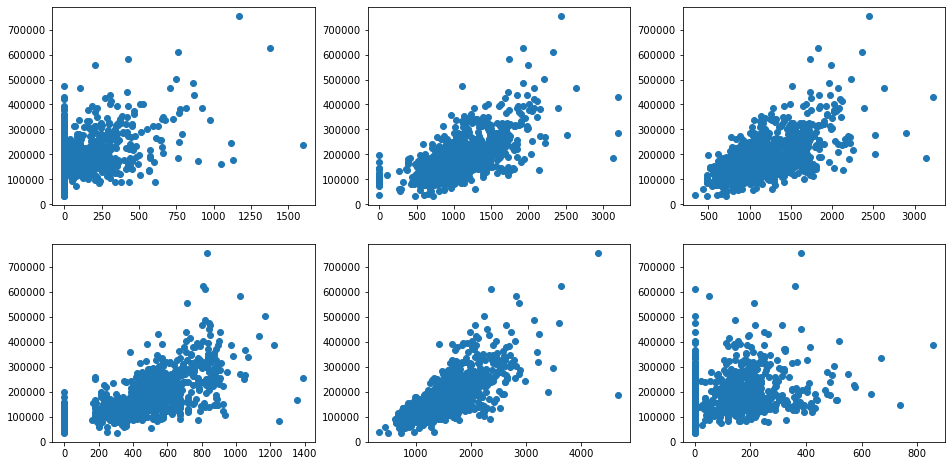

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df.SalePrice)

Plotting heatmap to check the corellation between varables

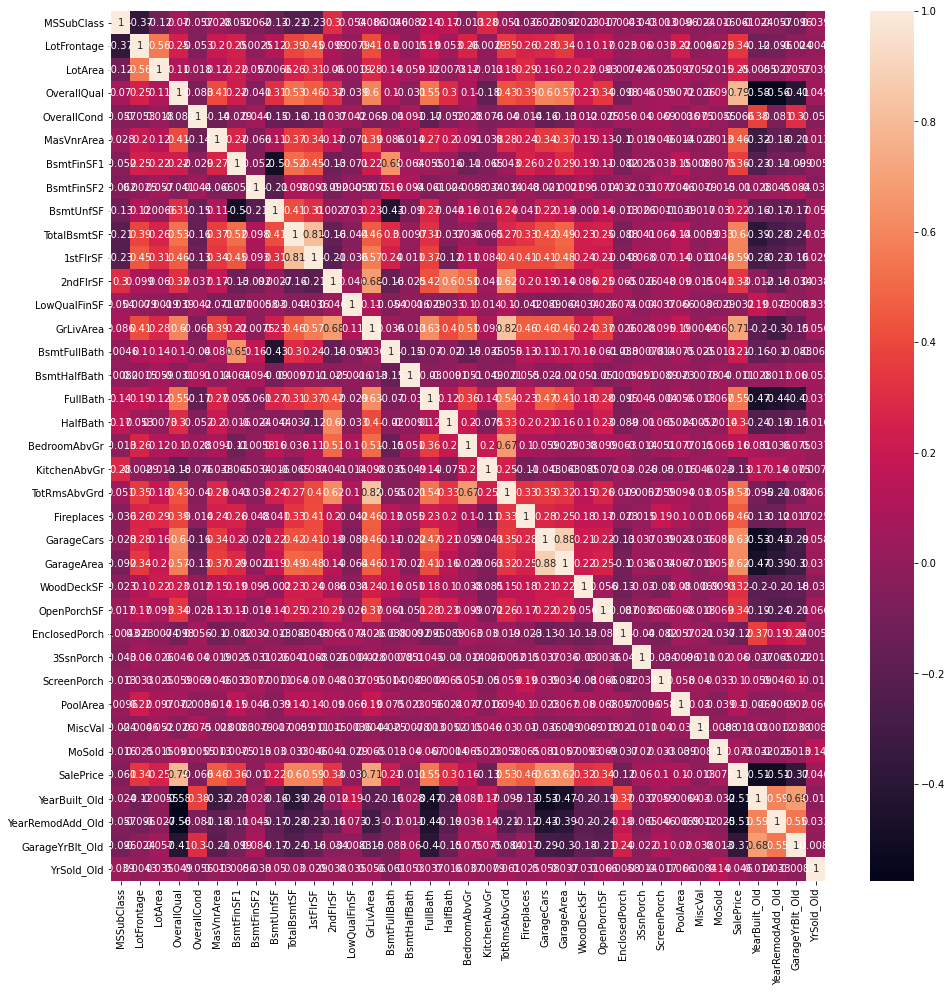

In [36]:
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [37]:
df.shape

(1168, 78)

In [39]:
num_col = list(df.dtypes[df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [41]:
df.shape

(1151, 78)

In [42]:

df[list(df.dtypes[df.dtypes=='object'].index)].head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,NaN,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,NaN,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,NaN,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,NaN,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,NaN,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [43]:

df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,TA,Gd,TA,No,ALQ,Unf,TA,Y,TA,RFn,TA,TA,TA,IR1
1,Mod,Gd,TA,Gd,Gd,ALQ,Rec,Ex,Y,Gd,Unf,TA,TA,Gd,IR1
2,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,TA,Unf,TA,TA,TA,IR1
3,Gtl,TA,Gd,TA,No,BLQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,No,ALQ,Unf,Gd,Y,Gd,Fin,TA,TA,TA,IR1


In [44]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

Lets take a look into the converted column

In [45]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,2,4,3,1,5,1,2,1,2,2,3,3,2,0
1,1,3,3,4,4,5,3,4,1,3,1,3,3,3,0
2,0,3,4,3,3,6,1,4,1,2,1,3,3,2,0
3,0,2,4,3,1,4,1,4,1,2,2,3,3,2,0
4,0,3,4,3,1,5,1,3,1,3,3,3,3,2,0


Creating and joining dummy column with the actual dataset

In [46]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price = pd.concat([df,dummy_col],axis='columns')

house_price = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

Let us check the distribution of our target variable before scaling and Splitting

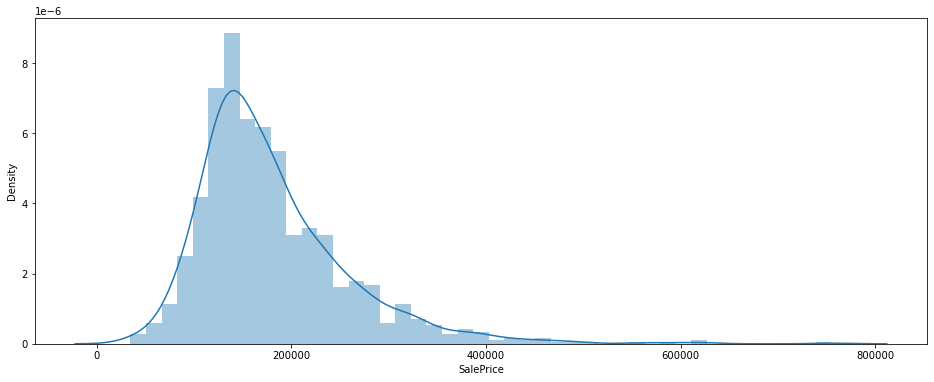

In [47]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

Creating train and test dataset for validation purpose

In [48]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [49]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,2,4,3,1,5,1,2,1,2,2,3,3,2,0
1,1,3,3,4,4,5,3,4,1,3,1,3,3,3,0
2,0,3,4,3,3,6,1,4,1,2,1,3,3,2,0
3,0,2,4,3,1,4,1,4,1,2,2,3,3,2,0
4,0,3,4,3,1,5,1,3,1,3,3,3,3,2,0


Scaling the train dataset
Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable

In [52]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

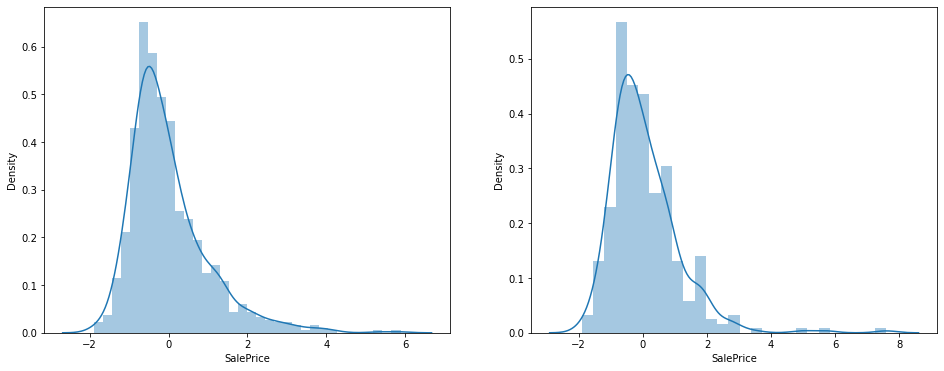

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [54]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

Now using RFE lets try to to find the optimal number of feature

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

In [58]:
df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

In [ ]:

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [ ]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

Lets try first with the Lasso

In [ ]:

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

In [ ]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [ ]:

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

In [ ]:

cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [ ]:

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

In [ ]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Now lets use the ridge regression

In [ ]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [ ]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

In [ ]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show(

On the basis of above graph lets create the mode

In [ ]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef'

In [ ]:

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Final Model

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


After compairing both models we can see that the below are the best features of the DataSet


MiscVal      : $Value of miscellaneous feature

BsmtHalfBath : Basement half bathrooms

LowQualFinSF : Low quality finished square feet (all floors)

BsmtFullBath : Basement full bathrooms

HalfBath     : Half baths above grade

Best alpha value for Lasso : {'alpha': 0.001}

Best alpha value for Ridge : {'alpha': 0.9}
